In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Przygotować programy do aproksymacji średniokwadratowej (dyskretnej) wielomianami algebraicznymi.

Zadana funkcja

In [2]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

Rysowanie funkcji

In [31]:
def plot_function(func, range_a, range_b, title, color = None):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]
    
    if color == None:
        plt.plot(func_x, func_y, label = title)
    else:
        plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

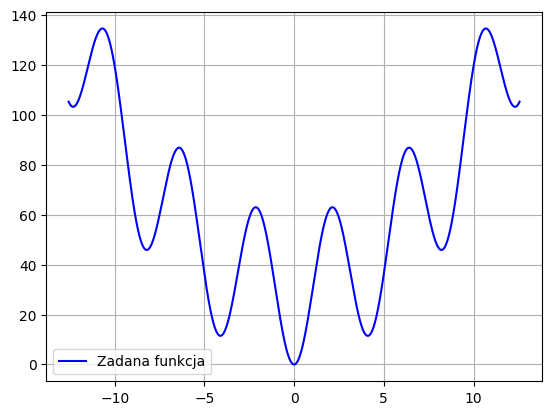

In [33]:
plot_function(f, f_range_a, f_range_b, "Zadana funkcja", "blue")

Aproksymacja wielomianowa

![title](img_vsc/img01.png)

![title](img_vsc/img02.png)

![title](img_vsc/img03.png)

![title](img_vsc/img04.png)

Stara funkcja, źle wyliczająca stopień wielomianu

In [53]:
def old_calculate_approx(xs, ys, m, w):
    
    raise Exception("Function deprecated")

    G = np.zeros((m, m))
    B = np.zeros(m)
    
    for j in range(m):
        for k in range(m):
            
            G[j][k] = sum([w[i] * (xs[i] ** (j + k)) for i in range(len(xs))])
        
        B[j] = sum([w[i] * ys[i] * (xs[i] ** j) for i in range(len(xs))])
   
    A = np.linalg.solve(G, B) 

    return lambda x : sum([A[i] * (x ** i) for i in range(m)])

Nowa funkcja, dobrze wyliczająca stopnień wielomianu

In [4]:
def calculate_approx(xs, ys, m, w):
    
    G = np.zeros((m + 1, m + 1))
    B = np.zeros(m + 1)

    for j in range(m + 1):
        for k in range(m + 1):
            G[j][k] = sum([w[i] * (xs[i] ** min(j + k, 2 * m + 1)) for i in range(len(xs))])
        
        B[j] = sum([w[i] * ys[i] * (xs[i] ** j) for i in range(len(xs))])
   
    A = np.linalg.solve(G, B)
    
    return lambda x : sum([A[i] * (x ** i) for i in range(m + 1)])

In [5]:
def draw_approx(n, m, img):

    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    w = [1 for _ in range(len(xs))]

    calculated_function = calculate_approx(xs, ys, m, w)

    plot_function(f, f_range_a, f_range_b, "Zadana funkcja", "blue")
    
    plot_function(calculated_function, f_range_a, f_range_b, "Funkcja aproksymująca", "red")
    
    #plt.plot(xs, calculated_ys, color = 'red', label = "Funkcja Funkcja interpolowana")
    plt.scatter(xs, ys, color = 'black', label = "Nodes")
    plt.title("Function approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig(img + ".png")
    plt.show()

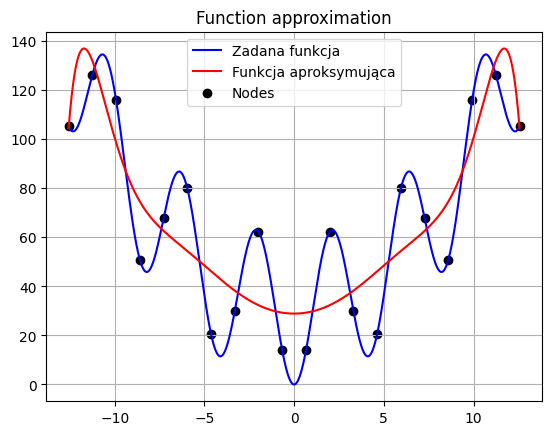

In [12]:
draw_approx(20, 10, "demo")

In [6]:
def approx(n, m, w):
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = [f(xs[i]) for i in range(len(xs))]
    
    calculated_function = calculate_approx(xs, ys, m, w)

    return calculated_function

Sposoby obliczania błędów aproksymacji

Błąd maksymalny

In [7]:
def approximation_maximum_difference(n, m, test_points = 1000):

    maksimum = float('-inf')

    #Evenly distributed xs
    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m, [1 for _ in range(n)])

    for i in range(test_points):

        temp = abs(f(xs[i]) - approx_function(xs[i]))

        maksimum = temp if temp > maksimum else maksimum
    
    return maksimum

In [8]:
def calculate_maximum_difference():

    for n in range(3, 100):
        for m in range(1, n + 1):
            print(n, m, approximation_maximum_difference(n, m, 1000))

In [160]:
calculate_maximum_difference()

3 1 70.17840792908379
3 2 70.17840792908379
3 3 59.99866494451235
4 1 76.10615599517017
4 2 76.10615599517018
4 3 59.9986649445123
4 4 59.998664944512356
5 1 76.63244454936935
5 2 76.63244454936935
5 3 42.81668725671406
5 4 42.81668725671406
5 5 79.10274521604
6 1 74.12325187342648
6 2 74.12325187342648
6 3 49.76664102988332
6 4 49.76664102988332
6 5 59.54404979334076
6 6 59.54404979334076
7 1 87.80346491497978
7 2 87.8034649149798
7 3 59.99866494451233
7 4 59.99866494451236
7 5 59.998664944512385
7 6 59.99866494451278
7 7 59.99866494451862
8 1 71.36274595806316
8 2 71.36274595806316
8 3 50.23691057126733
8 4 50.23691057126733
8 5 59.25074685058378
8 6 59.25074685058378
8 7 59.98332765229729
8 8 59.983327652297305
9 1 70.5261295261788
9 2 70.5261295261788
9 3 40.932213804673054
9 4 40.93221380467304
9 5 46.96090424026987
9 6 46.96090424026988
9 7 55.11091274868676
9 8 55.11091274868767
9 9 46.33933193694029
10 1 69.88468711619467
10 2 69.88468711619467
10 3 38.99774051722534
10 4 38.99

In [9]:
def approximation_mean_difference(n, m, test_points = 1000):

    suma = 0

    xs = np.linspace(f_range_a, f_range_b, test_points)
        
    approx_function = approx(n, m, [1 for _ in range(n)])

    for i in range(test_points):

        suma += (f(xs[i]) - approx_function(xs[i]))
    
    return(f"{suma / test_points}")

In [10]:
def errors(n, desc):
    
    max_diff = [approximation_maximum_difference(n, m, 1000) for m in range(3, n + 1)]
    mean_diff = [approximation_mean_difference(n, m, 1000) for m in range(3, n + 1)]
    
    if desc == True:
    
        print("degree | max diff | mean diff")
        for i in range(len(max_diff)):
            print(i + 3, " | ", max_diff[i], " | ", mean_diff[i])
    
    else:
        
        print("max diff")
        for x in max_diff:
            print(x)
        print("mean diff")
        for x in mean_diff:
            print(x)

In [11]:
def analyse(n, m, img, test_points = 1000):
    
    print("Max: ", approximation_maximum_difference(n, m, test_points), "Mean: ", approximation_mean_difference(n, m, test_points))
    draw_approx(n, m, img)

Dla 6 węzłów

In [21]:
errors(6, True)

degree | max diff | mean diff
3  |  49.76664102988332  |  -2.0723000475708715
4  |  59.54404979334076  |  0.35909344223949563
5  |  59.54404979334076  |  0.35909344223949935
6  |  63.42154106216047  |  -3.2480749033023932


In [22]:
errors(6, False)

max diff
49.76664102988332
59.54404979334076
59.54404979334076
63.42154106216047
mean diff
-2.0723000475708715
0.35909344223949563
0.35909344223949935
-3.2480749033023932


Max:  49.76664102988332 Mean:  -2.0723000475708715


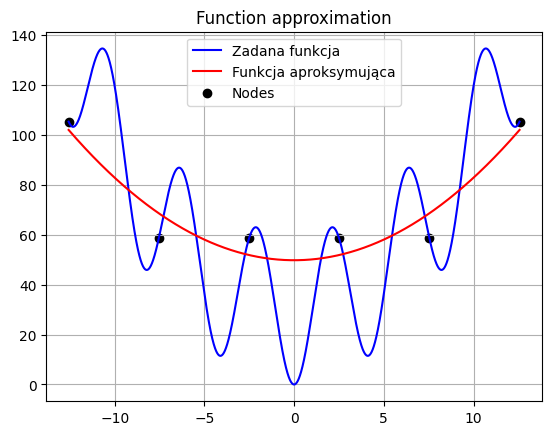

In [23]:
analyse(6, 3, "img01")

Max:  59.54404979334076 Mean:  0.35909344223949563


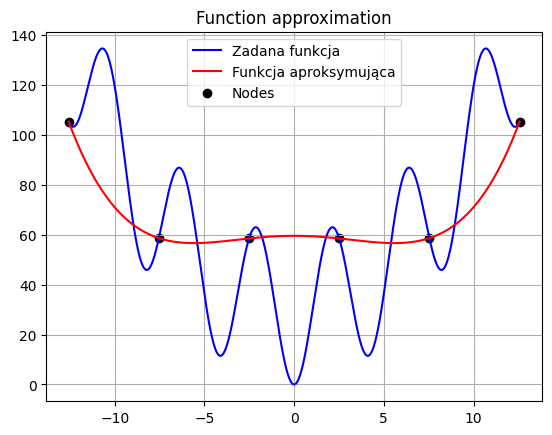

In [24]:
analyse(6, 4, "img02")

Max:  59.54404979334076 Mean:  0.35909344223949935


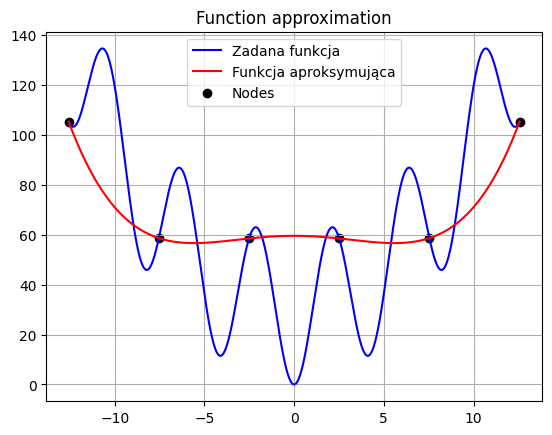

In [25]:
analyse(6, 5, "img03")

Max:  63.42154106216047 Mean:  -3.2480749033023932


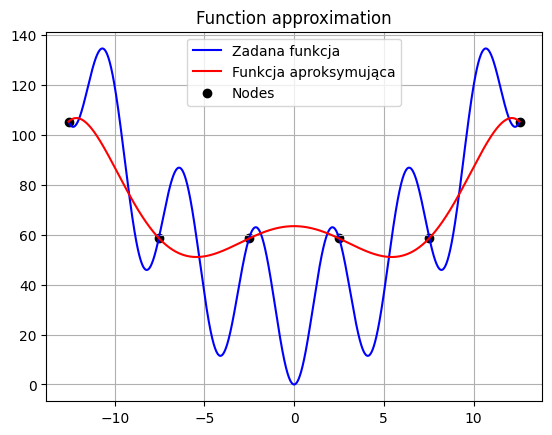

In [27]:
analyse(6, 6, "img04")

Dla 10 węzłów

In [28]:
errors(10, True)

degree | max diff | mean diff
3  |  38.99774051722534  |  1.4497297297297553
4  |  41.44606971077043  |  -0.7664025822755595
5  |  41.446069710770445  |  -0.7664025822755591
6  |  40.099975642154774  |  -3.059750054300193
7  |  40.09997564215759  |  -3.059750054300342
8  |  87.0707003066248  |  7.29204920325815
9  |  87.07070031084743  |  7.292049203257772
10  |  208.470733007518  |  21.304148652772955


In [29]:
errors(10, False)

max diff
38.99774051722534
41.44606971077043
41.446069710770445
40.099975642154774
40.09997564215759
87.0707003066248
87.07070031084743
208.470733007518
mean diff
1.4497297297297553
-0.7664025822755595
-0.7664025822755591
-3.059750054300193
-3.059750054300342
7.29204920325815
7.292049203257772
21.304148652772955


Max:  41.446069710770445 Mean:  -0.7664025822755591


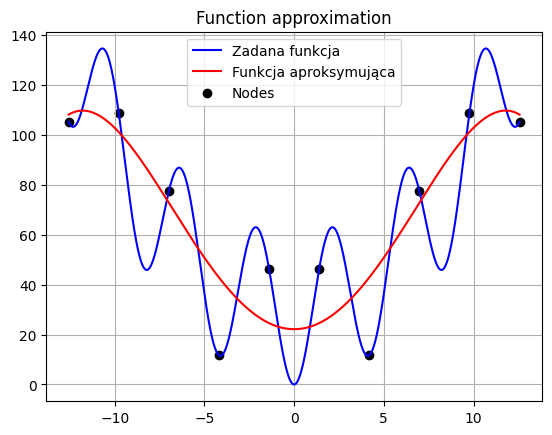

In [30]:
analyse(10, 5, "img06")

Max:  40.099975642154774 Mean:  -3.059750054300193


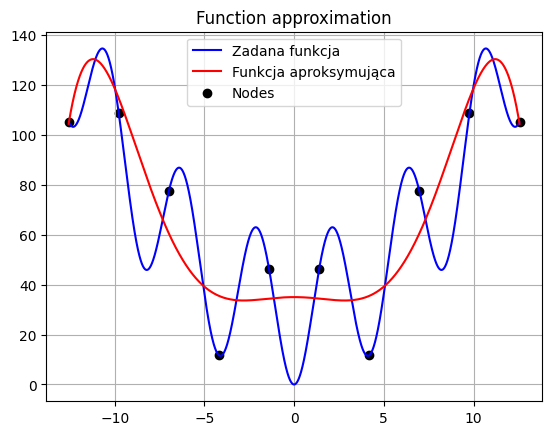

In [31]:
analyse(10, 6, "img07")

Max:  40.09997564215759 Mean:  -3.059750054300342


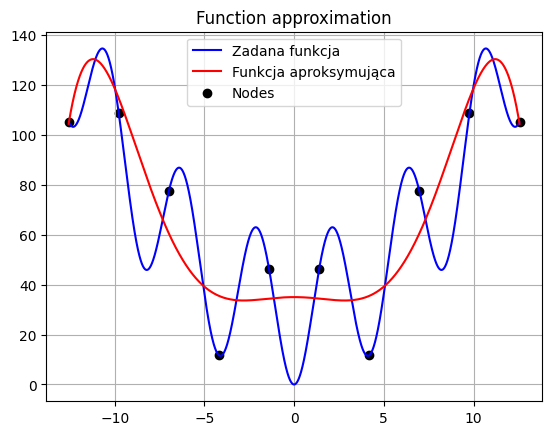

In [32]:
analyse(10, 7, "img08")

Max:  87.0707003066248 Mean:  7.29204920325815


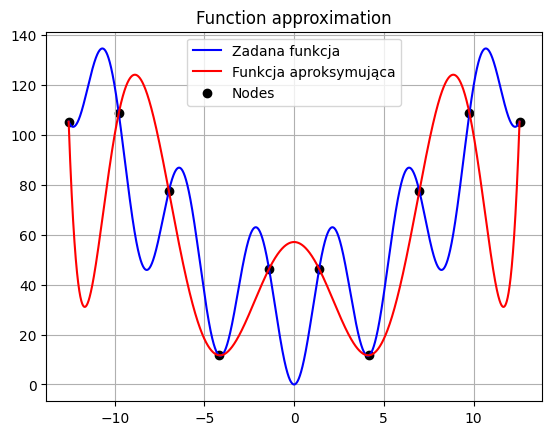

In [33]:
analyse(10, 8, "img09")

Dla 15 węzłów

In [76]:
errors(15, True)

degree | max diff | mean diff
3  |  36.23391452147925  |  1.339292444003417
4  |  35.4342934263758  |  0.4293882344642466
5  |  35.43429342637579  |  0.4293882344642463
6  |  35.36836005696047  |  -0.6410821440753848
7  |  35.36836005696087  |  -0.6410821440753816
8  |  36.50015306230755  |  -2.17567987973748
9  |  36.50015306230331  |  -2.1756798797368737
10  |  83.3711506101302  |  -5.608992810001146
11  |  83.37115061944343  |  -5.608992809995819
12  |  191.66080767508097  |  -13.360800576287042
13  |  191.66081167944762  |  -13.360800576523356
14  |  5428.702800045827  |  388.5108862857184
15  |  6009.283820453642  |  388.51063811897444


In [77]:
errors(15, False)

max diff
36.23391452147925
35.4342934263758
35.43429342637579
35.36836005696047
35.36836005696087
36.50015306230755
36.50015306230331
83.3711506101302
83.37115061944343
191.66080767508097
191.66081167944762
5428.702800045827
6009.283820453642
mean diff
1.339292444003417
0.4293882344642466
0.4293882344642463
-0.6410821440753848
-0.6410821440753816
-2.17567987973748
-2.1756798797368737
-5.608992810001146
-5.608992809995819
-13.360800576287042
-13.360800576523356
388.5108862857184
388.51063811897444


Max:  35.43429342637579 Mean:  0.4293882344642463


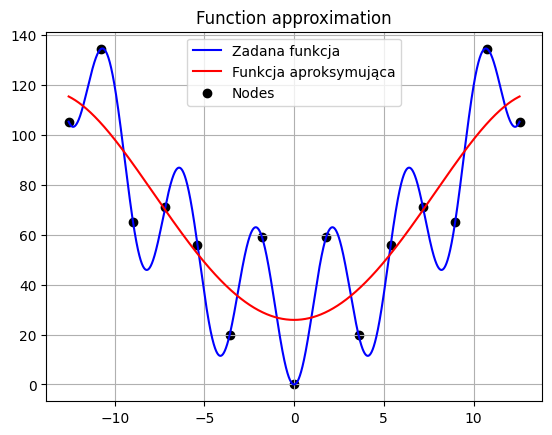

In [84]:
analyse(15, 5, "img11")

Max:  35.36836005696047 Mean:  -0.6410821440753848


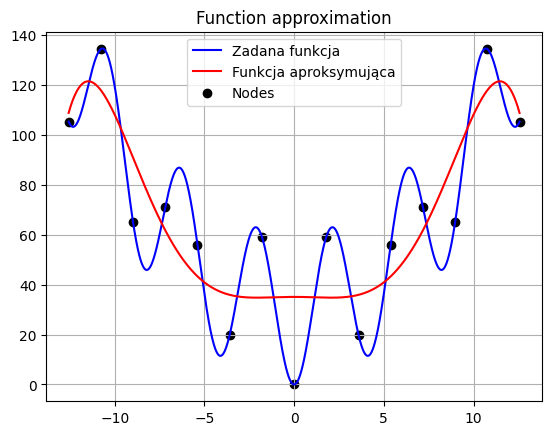

In [85]:
analyse(15, 6, "img12")

Max:  35.36836005696087 Mean:  -0.6410821440753816


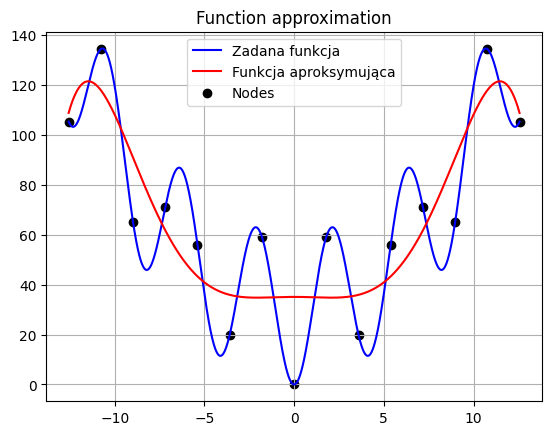

In [93]:
analyse(15, 7, "img13")

Max:  36.50015306230755 Mean:  -2.17567987973748


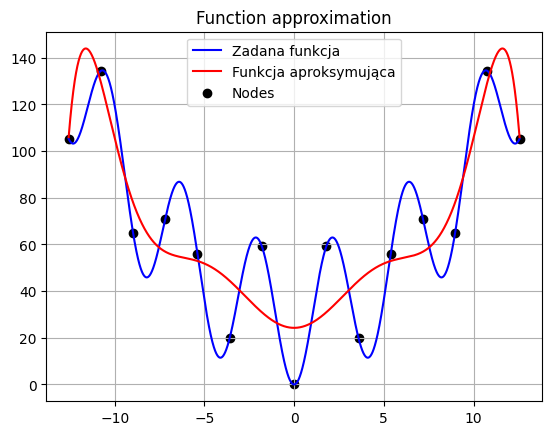

In [95]:
analyse(15, 8, "img14")

Dla 20 węzłów

In [96]:
errors(20, True)

degree | max diff | mean diff
3  |  35.0595573232919  |  1.0954700970044782
4  |  34.59781069798626  |  0.4843662596789106
5  |  34.597810697986276  |  0.48436625967891145
6  |  34.33374925557985  |  -0.24657283305582012
7  |  34.33374925558015  |  -0.24657283305576344
8  |  33.71324329864599  |  -0.9536294512714663
9  |  33.71324329864549  |  -0.9536294512714685
10  |  31.689474815704095  |  -1.234614136436687
11  |  31.689474815703306  |  -1.2346141364362573
12  |  38.51366395914621  |  1.4714539680226961
13  |  38.51366395923144  |  1.4714539679957872
14  |  320.2236172057395  |  16.77750749682335
15  |  320.2238932353437  |  16.777507495532927
16  |  1291.1253312739268  |  -68.03439510848534
17  |  1291.477535684706  |  -68.03432686067525
18  |  3166.3981864835873  |  165.55603557031392
19  |  3365.4010427966637  |  165.53749642080874
20  |  8757.769609153438  |  450.54621540143717


In [97]:
errors(20, False)

max diff
35.0595573232919
34.59781069798626
34.597810697986276
34.33374925557985
34.33374925558015
33.71324329864599
33.71324329864549
31.689474815704095
31.689474815703306
38.51366395914621
38.51366395923144
320.2236172057395
320.2238932353437
1291.1253312739268
1291.477535684706
3166.3981864835873
3365.4010427966637
8757.769609153438
mean diff
1.0954700970044782
0.4843662596789106
0.48436625967891145
-0.24657283305582012
-0.24657283305576344
-0.9536294512714663
-0.9536294512714685
-1.234614136436687
-1.2346141364362573
1.4714539680226961
1.4714539679957872
16.77750749682335
16.777507495532927
-68.03439510848534
-68.03432686067525
165.55603557031392
165.53749642080874
450.54621540143717


Max:  33.71324329864549 Mean:  -0.9536294512714685


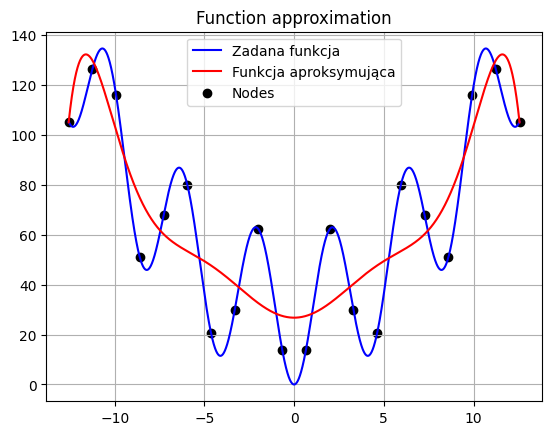

In [128]:
analyse(20, 9, "img16")

Max:  31.689474815704095 Mean:  -1.234614136436687


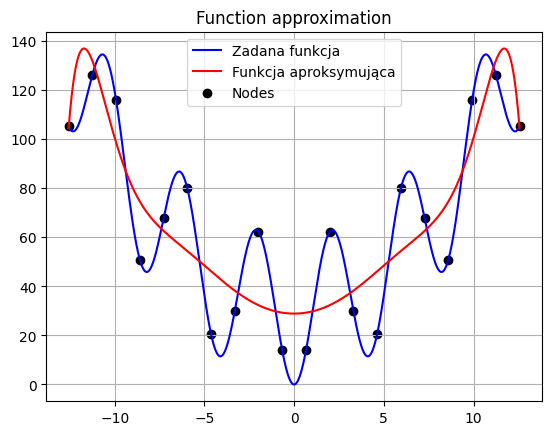

In [129]:
analyse(20, 10, "img17")

Max:  31.689474815703306 Mean:  -1.2346141364362573


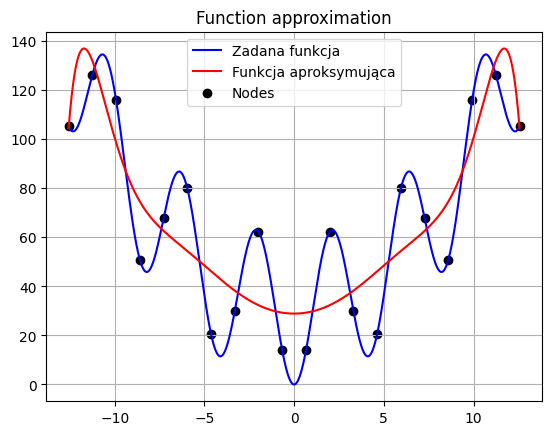

In [130]:
analyse(20, 11, "img18")

Max:  38.51366395914621 Mean:  1.4714539680226961


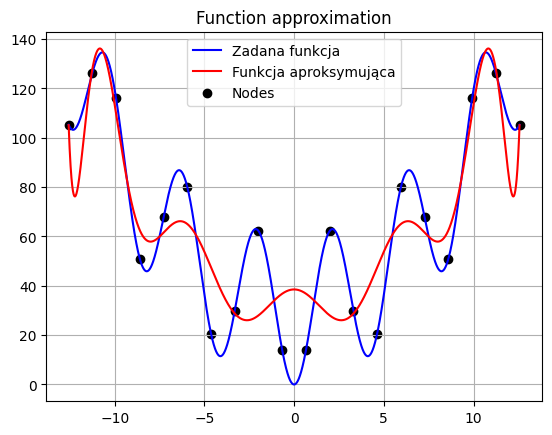

In [131]:
analyse(20, 12, "img19")

Dla 25 węzłów

In [135]:
errors(25, True)

degree | max diff | mean diff
3  |  34.31011317098866  |  0.917573660617145
4  |  34.263506064786114  |  0.45787491218379317
5  |  34.26350606478613  |  0.4578749121837933
6  |  34.071413123645044  |  -0.13116581355090948
7  |  34.07141312364586  |  -0.13116581355090848
8  |  33.01295989074664  |  -0.6415211706848317
9  |  33.01295989074451  |  -0.6415211706846341
10  |  32.87189274651246  |  -0.6544260776383195
11  |  32.87189274665479  |  -0.6544260776384322
12  |  38.23433711715684  |  0.7736536269274286
13  |  38.23433711889439  |  0.7736536269104578
14  |  86.64217676721596  |  3.5049095986992094
15  |  86.64223078890724  |  3.504909598757407
16  |  274.5039071645823  |  -11.420751691925053
17  |  274.52080481920257  |  -11.420755711052992
18  |  455.54836346792996  |  18.97839667744645
19  |  456.6259385283034  |  18.978384637319945
20  |  365.7376344052422  |  -15.074280641944952
21  |  414.120519994914  |  -15.089433924332692
22  |  1470.9262883530278  |  -60.55649497015435
23 

In [134]:
errors(25, False)

max diff
34.31011317098866
34.263506064786114
34.26350606478613
34.071413123645044
34.07141312364586
33.01295989074664
33.01295989074451
32.87189274651246
32.87189274665479
38.23433711715684
38.23433711889439
86.64217676721596
86.64223078890724
274.5039071645823
274.52080481920257
455.54836346792996
456.6259385283034
365.7376344052422
414.120519994914
1470.9262883530278
1525.6453152724239
2396.6483823244675
2529.2695630444546
mean diff
0.917573660617145
0.45787491218379317
0.4578749121837933
-0.13116581355090948
-0.13116581355090848
-0.6415211706848317
-0.6415211706846341
-0.6544260776383195
-0.6544260776384322
0.7736536269274286
0.7736536269104578
3.5049095986992094
3.504909598757407
-11.420751691925053
-11.420755711052992
18.97839667744645
18.978384637319945
-15.074280641944952
-15.089433924332692
-60.55649497015435
-60.59417419747238
-97.09741062740233
-96.96890163065112


Max:  32.87189274665479 Mean:  -0.6544260776384322


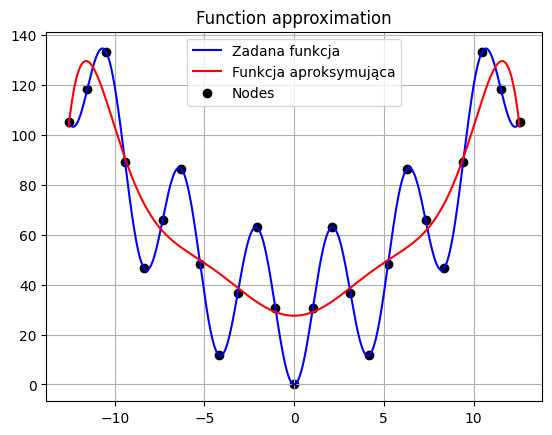

In [160]:
analyse(25, 11, "img21")

Max:  38.23433711715684 Mean:  0.7736536269274286


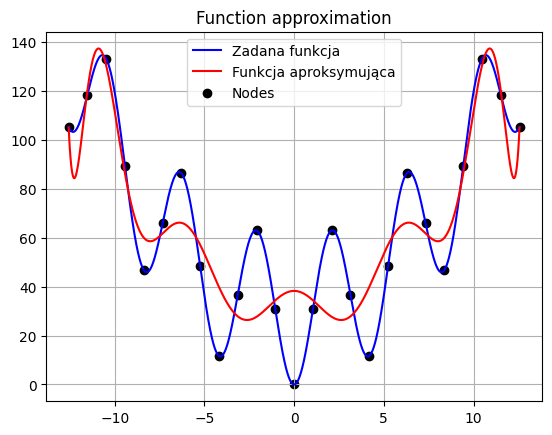

In [161]:
analyse(25, 12, "img22")

Max:  38.23433711889439 Mean:  0.7736536269104578


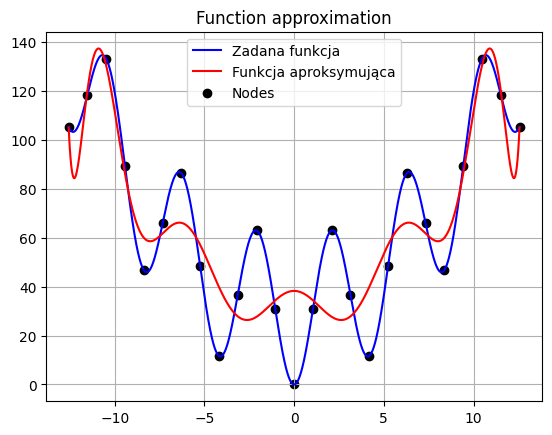

In [162]:
analyse(25, 13, "img23")

Max:  86.64217676721596 Mean:  3.5049095986992094


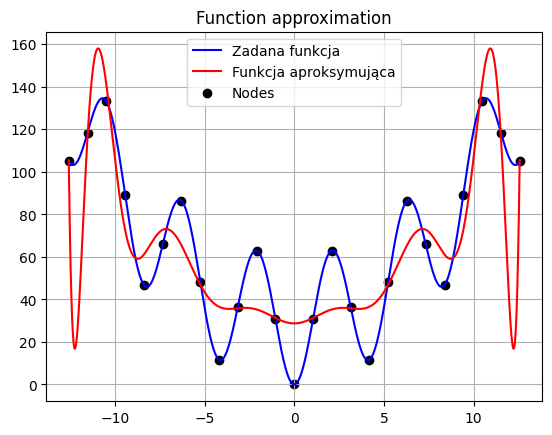

In [163]:
analyse(25, 14, "img24")

In [55]:
errors(50, True)

degree | max diff | mean diff
3  |  32.64768081880307  |  0.49389509553859623
4  |  33.670061808085364  |  0.30114124547347415
5  |  33.67006180808542  |  0.3011412454734759
6  |  33.94909508020278  |  -0.019764757276893165
7  |  33.949095080203136  |  -0.019764757276892808
8  |  32.922241329627376  |  -0.32272568086151043
9  |  32.92224132962605  |  -0.3227256808613968
10  |  33.39478181368181  |  -0.300196228355254
11  |  33.39478181374202  |  -0.30019622835535037
12  |  37.16503570205908  |  0.16091548775375566
13  |  37.165035701949016  |  0.16091548775263526
14  |  33.20873494061244  |  0.3557658343072012
15  |  33.20873493994066  |  0.35576583429236913
16  |  30.045295783068383  |  -0.5693305704680013
17  |  30.045313471822794  |  -0.5693306005551088
18  |  24.260631423246707  |  0.47252108646257873
19  |  24.260625569252994  |  0.4725196145684883
20  |  14.59951752443925  |  -0.292340755793112
21  |  14.67172258181239  |  -0.29233676839888095
22  |  18.958923345192346  |  0.3749

In [56]:
errors(50, False)

max diff
32.64768081880307
33.670061808085364
33.67006180808542
33.94909508020278
33.949095080203136
32.922241329627376
32.92224132962605
33.39478181368181
33.39478181374202
37.16503570205908
37.165035701949016
33.20873494061244
33.20873493994066
30.045295783068383
30.045313471822794
24.260631423246707
24.260625569252994
14.59951752443925
14.67172258181239
18.958923345192346
22.03395886124862
27.1043630267894
24.83857452263409
436.1095032000384
267.56124005256504
157.13078848482758
203.18149739293665
57.09111618524831
43.89034467050625
39.35784446425451
42.98635762208792
106.87560613173811
192.28627283336314
119.53143562725565
123.11782691674127
414.1222539371829
552.0154923801292
9302.163717095273
675.3637906345557
633.8099462608825
2247.4088953430783
418.12392830616045
1826.6556175644528
2032.1389061468672
843.4012679043244
3222.128580040766
1519.5662477626483
4700.146254889203
mean diff
0.49389509553859623
0.30114124547347415
0.3011412454734759
-0.019764757276893165
-0.0197647572768

Max:  30.045313471822794 Mean:  -0.5693306005551088


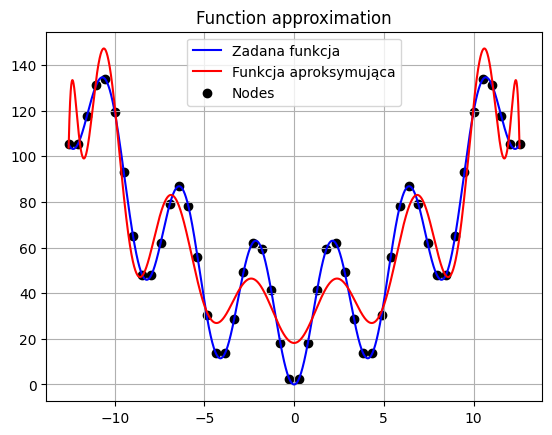

In [72]:
analyse(50, 17, "img26")

Max:  24.260631423246707 Mean:  0.47252108646257873


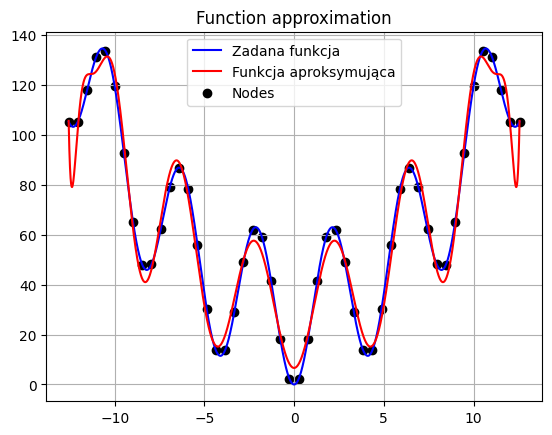

In [73]:
analyse(50, 18, "img27")

Max:  14.67172258181239 Mean:  -0.29233676839888095


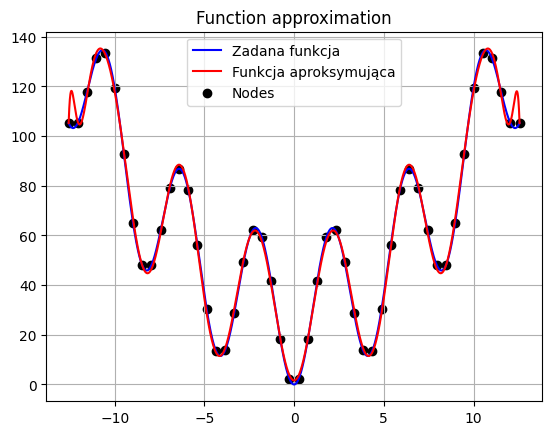

In [74]:
analyse(50, 21, "img28")

Max:  18.958923345192346 Mean:  0.3749685403340055


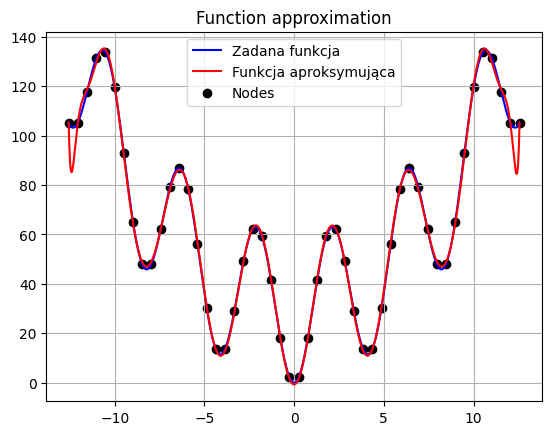

In [75]:
analyse(50, 22, "img29")

In [76]:
def errors2(m, desc):
    
    max_diff = [approximation_maximum_difference(n, m, 1000) for n in range(m, 100 + 1)]
    mean_diff = [approximation_mean_difference(n, m, 1000) for n in range(m, 100 + 1)]
    
    if desc == True:
    
        print("degree | max diff | mean diff")
        for i in range(len(max_diff)):
            print(m + i, " | ", max_diff[i], " | ", mean_diff[i])
    
    else:
        
        print("max diff")
        for x in max_diff:
            print(x)
        print("mean diff")
        for x in mean_diff:
            print(x)

In [77]:
errors2(6, True)

degree | max diff | mean diff
6  |  63.42154106216047  |  -3.2480749033023932
7  |  59.99866494451862  |  29.970000000001004
8  |  59.98332765229729  |  -0.021394304556177204
9  |  55.11091274868676  |  1.4056487942702969
10  |  40.099975642154774  |  -3.059750054300193
11  |  38.15871295504747  |  -2.2825130702247303
12  |  37.413642510116134  |  -1.5762720850686534
13  |  36.53110052774044  |  -1.123438865146764
14  |  35.85498185535733  |  -0.833619708880427
15  |  35.36836005696047  |  -0.6410821440753846
16  |  35.01919297146105  |  -0.5079503828478121
17  |  34.765750557109314  |  -0.41251416451233947
18  |  34.57904813683696  |  -0.3419256730537366
19  |  34.43948395420112  |  -0.28828894921274856
20  |  34.33374925557985  |  -0.24657283305582012
21  |  34.25268441205279  |  -0.21346514473271155
22  |  34.189881679804074  |  -0.18672111156377502
23  |  34.14078389870202  |  -0.16477968446736735
24  |  34.102098805197265  |  -0.14653013589853475
25  |  34.071413123645044  |  -0.1

In [78]:
errors2(6, False)

max diff
63.42154106216047
59.99866494451862
59.98332765229729
55.11091274868676
40.099975642154774
38.15871295504747
37.413642510116134
36.53110052774044
35.85498185535733
35.36836005696047
35.01919297146105
34.765750557109314
34.57904813683696
34.43948395420112
34.33374925557985
34.25268441205279
34.189881679804074
34.14078389870202
34.102098805197265
34.071413123645044
34.04693418112338
34.027314054417445
34.01152797654132
33.99878899172742
33.988487208053755
33.98014599178388
33.97338999547887
33.96792156088131
33.96350312187567
33.95994395535785
33.957090116531226
33.95481672966135
33.953022037379654
33.95162277417205
33.950550545167125
33.94974897392842
33.94917144259083
33.9487792914705
33.94854037720271
33.948427912384766
33.94841952741718
33.948496508757714
33.94864317782571
33.94884638263699
33.94909508020278
33.94937999231533
33.94969332086351
33.95002851165357
33.9503800580065
33.95074333678731
33.951114471353044
33.95149021660976
33.951867862414545
33.95224515223762
33.952

Max:  34.071413123645044 Mean:  -0.13116581355090948


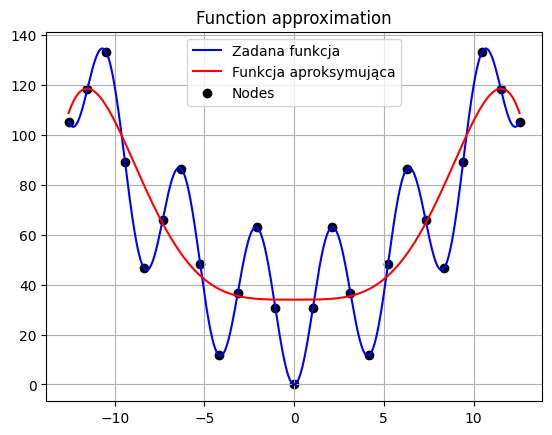

In [90]:
analyse(25,6, "img31")

Max:  33.94909508020278 Mean:  -0.019764757276893165


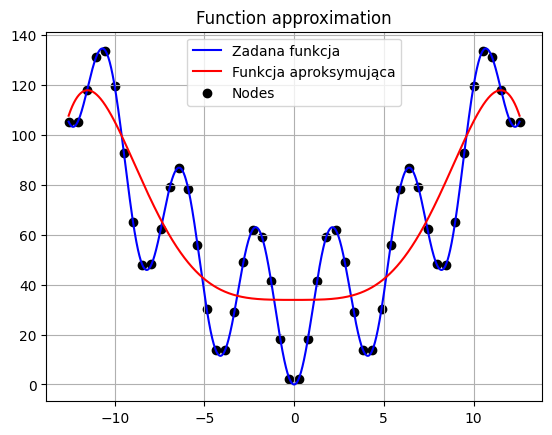

In [91]:
analyse(50,6, "img32")

Max:  33.95739315388008 Mean:  -0.003145605331813968


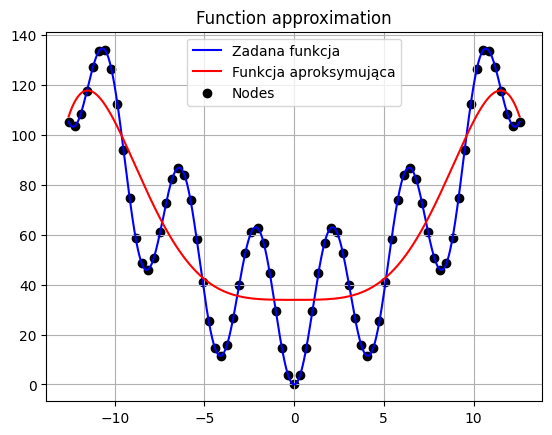

In [92]:
analyse(75,6, "img33")

Max:  33.96143047360451 Mean:  0.001738056856627523


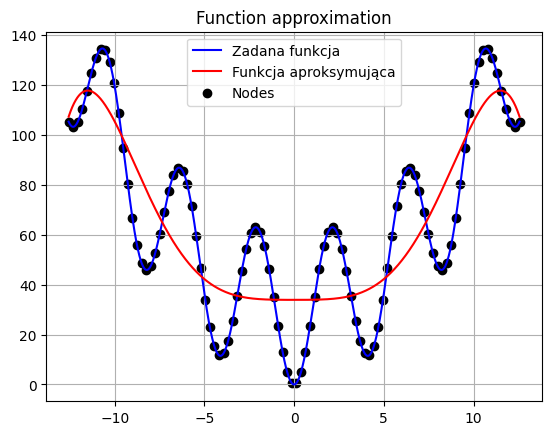

In [93]:
analyse(100,6, "img34")

In [94]:
errors2(10, True)

degree | max diff | mean diff
10  |  208.470733007518  |  21.304148652772955
11  |  432.10958948739  |  42.41225004717577
12  |  275.25022540251507  |  -24.912703492749706
13  |  196.40720302204755  |  -16.04187067703391
14  |  124.46572014126909  |  -9.215469569174145
15  |  83.3711506101302  |  -5.608992810001146
16  |  60.10184598472222  |  -3.6812524036985184
17  |  46.27226523847578  |  -2.589403272046099
18  |  37.62534188229377  |  -1.9320731318517812
19  |  31.941181075512148  |  -1.5138374744787428
20  |  31.689474815704095  |  -1.234614136436687
21  |  32.06142300543605  |  -1.0403237150655478
22  |  32.34521914733164  |  -0.9002382969022004
23  |  32.564638479388606  |  -0.7960893394673056
24  |  32.736275359950994  |  -0.7165694923965346
25  |  32.87189274651246  |  -0.6544260776383195
26  |  32.97996277873802  |  -0.6048580036163843
27  |  33.066683206114355  |  -0.5645968744245461
28  |  33.13665573031274  |  -0.5313616345044367
29  |  33.19334495190208  |  -0.50352457899

In [95]:
errors2(10, False)

max diff
208.470733007518
432.10958948739
275.25022540251507
196.40720302204755
124.46572014126909
83.3711506101302
60.10184598472222
46.27226523847578
37.62534188229377
31.941181075512148
31.689474815704095
32.06142300543605
32.34521914733164
32.564638479388606
32.736275359950994
32.87189274651246
32.97996277873802
33.066683206114355
33.13665573031274
33.19334495190208
33.2393934408174
33.27684117660801
33.30728058846583
33.33196757718727
33.35190207238014
33.36788718990102
33.38057319150198
33.39049050248106
33.398074779618405
33.40368610571166
33.407623847722775
33.410138236972415
33.41143947810238
33.41170496269972
33.41108502983002
33.40970758817402
33.40768185315892
33.40510139195858
33.4020466126175
33.398586801127884
33.39478181368181
33.3906834898954
33.38633680851987
33.38178087464118
33.37704975080561
33.37217314125796
33.367176989626
33.36208397827935
33.356913959678614
33.351684315854676
33.346410279785005
33.341105201781154
33.335780783002356
33.330447281244375
33.3251136

Max:  32.87189274651246 Mean:  -0.6544260776383195


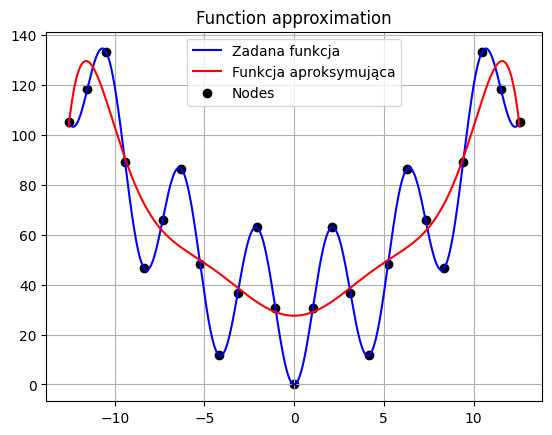

In [102]:
analyse(25,10, "img36")

Max:  33.39478181368181 Mean:  -0.300196228355254


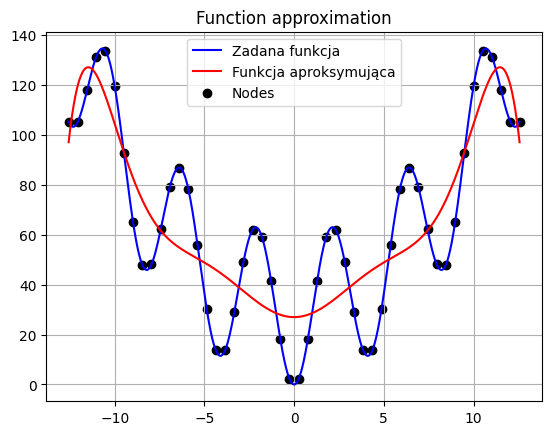

In [98]:
analyse(50,10, "img37")

Max:  33.39478181368181 Mean:  -0.300196228355254


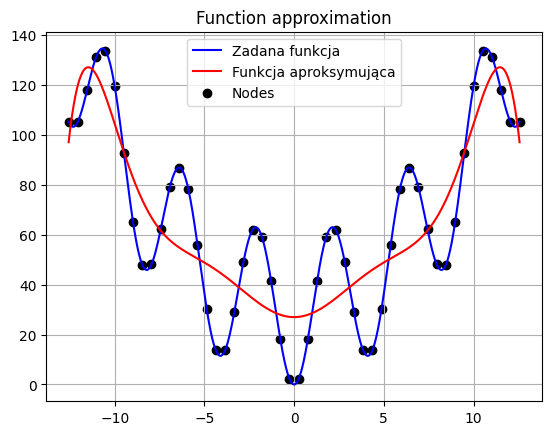

In [99]:
analyse(50,10, "img38")

Max:  33.16043681437413 Mean:  -0.18453942314257932


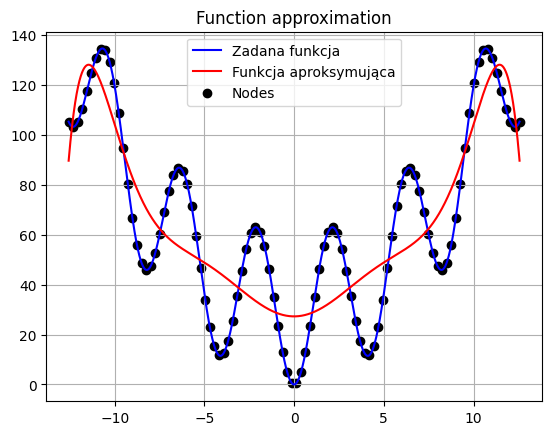

In [100]:
analyse(100,10, "img39")

In [103]:
errors2(15, True)

degree | max diff | mean diff
15  |  6009.283820453642  |  388.5106381189735
16  |  2486.9570700869817  |  166.19658662600952
17  |  1300.786431713253  |  81.44869292383918
18  |  754.5473150525171  |  44.40588308049849
19  |  475.18568949846673  |  26.364912105507404
20  |  320.2238932351109  |  16.777507495532653
21  |  227.92718000639496  |  11.304468058099635
22  |  169.9206459090662  |  7.988594342738555
23  |  131.5447633306716  |  5.876480815035673
24  |  105.33076320742255  |  4.472641079304722
25  |  86.64223078890724  |  3.5049095987573287
26  |  72.94698726419175  |  2.816463677984412
27  |  62.75674783181811  |  2.313108318016656
28  |  54.920179830429056  |  1.9361596003477721
29  |  48.77986907567683  |  1.647862992067182
30  |  43.888930977384575  |  1.423223660716288
31  |  39.96026988383074  |  1.245262605585528
32  |  36.76898685217567  |  1.1021819167333755
33  |  34.123995171315926  |  0.9856095883203834
34  |  32.014944981492846  |  0.88949410265799
35  |  32.17362

In [105]:
errors2(15, False)

max diff
6009.283820453642
2486.9570700869817
1300.786431713253
754.5473150525171
475.18568949846673
320.2238932351109
227.92718000639496
169.9206459090662
131.5447633306716
105.33076320742255
86.64223078890724
72.94698726419175
62.75674783181811
54.920179830429056
48.77986907567683
43.888930977384575
39.96026988383074
36.76898685217567
34.123995171315926
32.014944981492846
32.17362770929407
32.31272252934848
32.435105950389094
32.543149948819035
32.638834659955805
32.72381161287508
32.799465745952176
32.86697908181161
32.92735029400407
32.98143185322168
33.02996105476538
33.07356900877427
33.11280390662725
33.14814053558236
33.179996146934116
33.20873493994066
33.23467268539876
33.258092350812646
33.27924243643811
33.29834173264756
33.31558648366587
33.331149764022314
33.34518629112944
33.35783577824291
33.36922154807494
33.37945673198813
33.38863892006899
33.396861318785
33.40420534607077
33.410744743006845
33.41654480982044
33.42167111103629
33.42617288483001
33.430104229082815
33.4

Max:  86.64223078890724 Mean:  3.5049095987573287


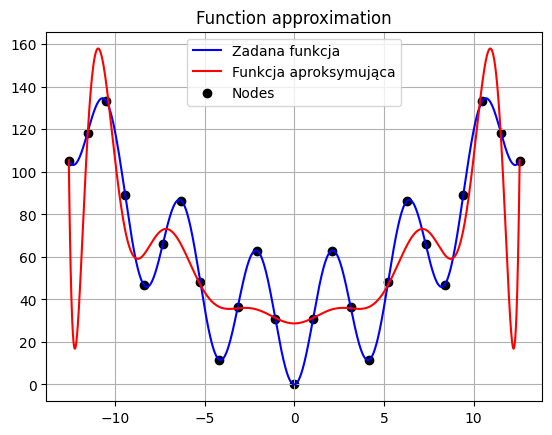

In [116]:
analyse(25, 15, "img41")

Max:  33.20873493994066 Mean:  0.35576583429236913


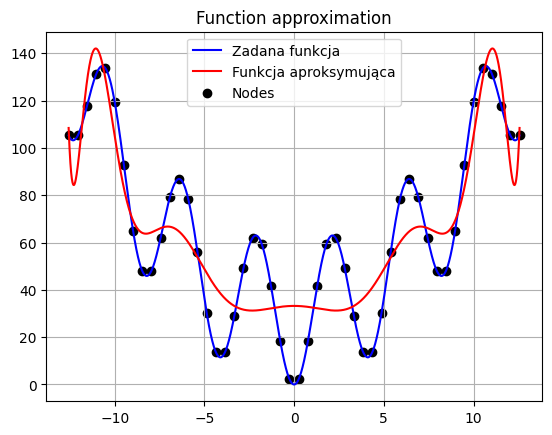

In [117]:
analyse(50, 15, "img42")

Max:  33.445026469806464 Mean:  0.22084013282024295


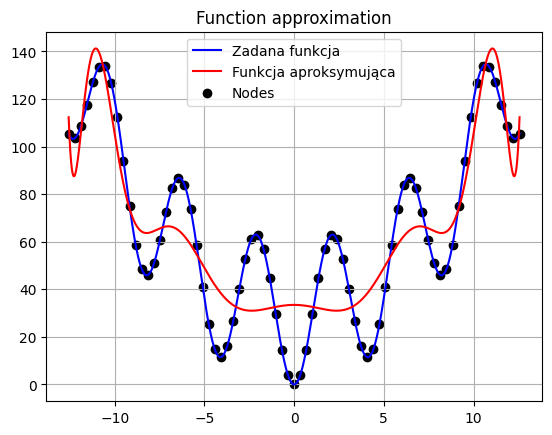

In [118]:
analyse(75, 15, "img43")

Max:  33.41404316108546 Mean:  0.1752108048921398


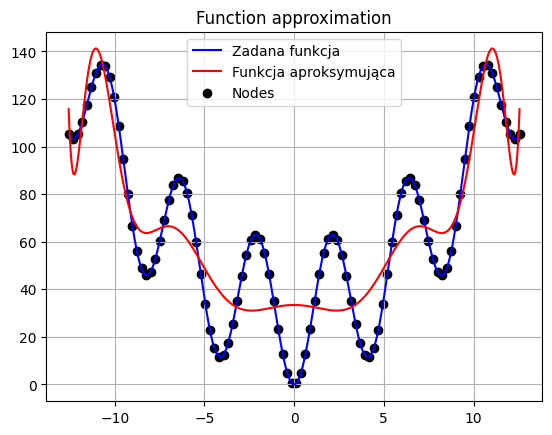

In [119]:
analyse(100, 15, "img44")

In [120]:
errors2(20, True)

degree | max diff | mean diff
20  |  8757.769609153438  |  450.5462154014275
21  |  3191.5925909994908  |  157.63007138171963
22  |  1935.793965926021  |  90.62208061571737
23  |  3252.2003413288858  |  -146.44244996407474
24  |  1741.1237040783558  |  -74.04716574129353
25  |  365.7376344052422  |  -15.074280641952285
26  |  299.5354674698069  |  -11.744084271252175
27  |  354.8977600100666  |  -13.497502104359608
28  |  237.0192268702417  |  -8.72574600063545
29  |  166.48030217726532  |  -5.929799234854045
30  |  162.25009469398114  |  -5.554435391177983
31  |  95.53711416189375  |  -3.178313633780988
32  |  100.91439991247657  |  -3.2527162981647546
33  |  88.69092305646095  |  -2.763044345306196
34  |  71.81444533167533  |  -2.1700555028478274
35  |  61.65085385877765  |  -1.8062337127767485
36  |  52.78005673641465  |  -1.505859187131972
37  |  43.80641260601709  |  -1.2115083447235118
38  |  42.7694765468886  |  -1.1508299649063336
39  |  35.41832499856258  |  -0.927002367570629

In [121]:
errors2(20, False)

max diff
8757.769609153438
3191.5925909994908
1935.793965926021
3252.2003413288858
1741.1237040783558
365.7376344052422
299.5354674698069
354.8977600100666
237.0192268702417
166.48030217726532
162.25009469398114
95.53711416189375
100.91439991247657
88.69092305646095
71.81444533167533
61.65085385877765
52.78005673641465
43.80641260601709
42.7694765468886
35.41832499856258
31.89171892263124
31.350213025893424
27.336185882996176
23.775847166973506
23.38551491146103
20.275371792457406
17.99921177114487
17.66827130803034
16.093984875559215
15.337179283808325
14.59951752443925
13.403903347679403
13.109553028603031
11.846914703265753
11.420544899773773
10.752254281897976
10.403299205244508
10.182222780545189
9.592473512754722
9.01875745435892
8.794850600657043
8.56748870737566
8.227459579014209
7.686680761870875
7.856802352943404
7.713462101534887
7.366185214144124
7.126939609886094
6.894332295523014
6.7248052104907
6.666508734931185
6.639895560459223
6.2263783605368275
6.092482703045889
6.17

Max:  365.7376344052422 Mean:  -15.074280641952285


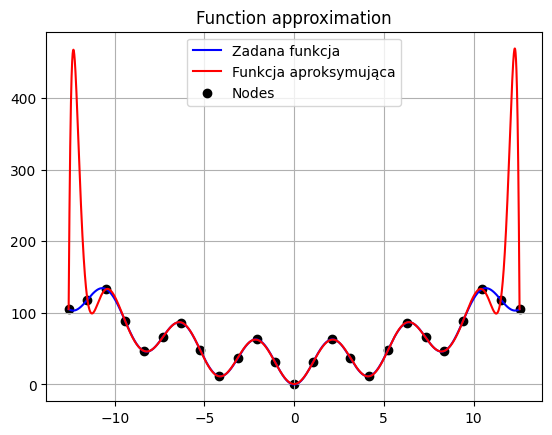

In [122]:
analyse(25, 20, "img46")

Max:  14.59951752443925 Mean:  -0.292340755793112


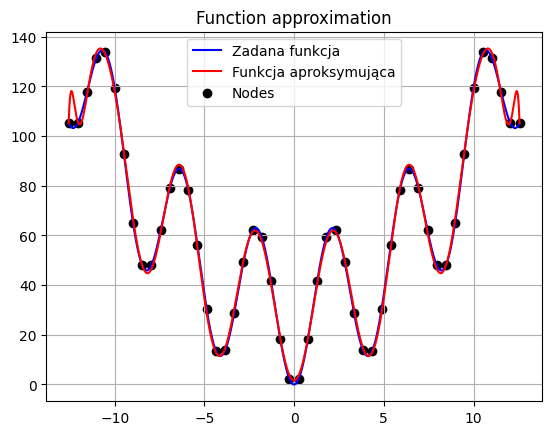

In [123]:
analyse(50, 20, "img47")

Max:  5.854461280161587 Mean:  -0.07399672861689016


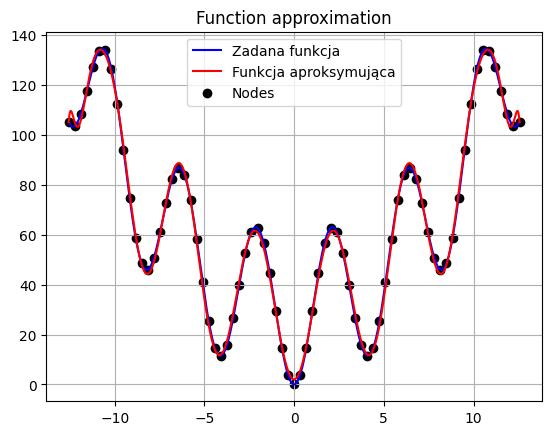

In [124]:
analyse(75, 20, "img48")

Max:  4.39306621113613 Mean:  -0.041372646251162846


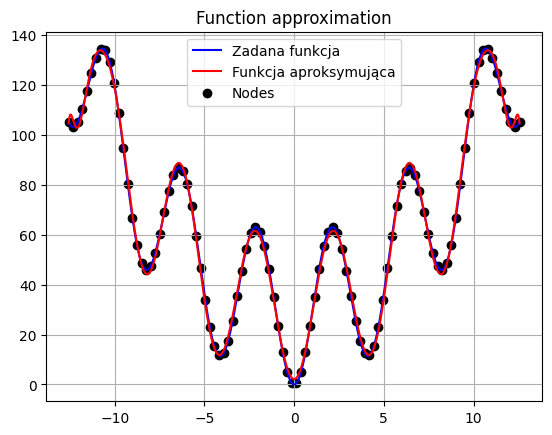

In [125]:
analyse(100, 20, "img49")

In [126]:
errors2(25, True)

degree | max diff | mean diff
25  |  2529.2695630444546  |  -96.9689016306574
26  |  2459.9329604403797  |  -84.34143729386285
27  |  1679.970167630327  |  -56.39593521384132
28  |  384.33796739774937  |  7.252424813739672
29  |  286.10250241188385  |  -8.93335983723157
30  |  3112.2303110958187  |  73.36919034262567
31  |  1257.7710095617101  |  31.756035281507568
32  |  249.74146272281365  |  8.018165704495864
33  |  241.54592834018973  |  6.073819699895346
34  |  1581.26801701354  |  -7.454980708663124
35  |  111.71117390979185  |  2.942713233459601
36  |  30193.962227662076  |  -211.33365498040263
37  |  46.15234731694812  |  -0.06649776887357592
38  |  163.83128713144794  |  3.5522898502840707
39  |  150.3368622875201  |  2.632485567150051
40  |  97.54234613644763  |  1.095525578121415
41  |  56.128552332090806  |  1.1817336668091118
42  |  29.853179952573157  |  0.7097562044068289
43  |  45.512538261576594  |  1.0509268874367446
44  |  34.248922572740014  |  0.7340753570245806
45

In [127]:
errors2(25, False)

max diff
2529.2695630444546
2459.9329604403797
1679.970167630327
384.33796739774937
286.10250241188385
3112.2303110958187
1257.7710095617101
249.74146272281365
241.54592834018973
1581.26801701354
111.71117390979185
30193.962227662076
46.15234731694812
163.83128713144794
150.3368622875201
97.54234613644763
56.128552332090806
29.853179952573157
45.512538261576594
34.248922572740014
34.56658207263612
33.36427175904909
48.15647649741081
20.760338428889455
291.3276760301152
24.83857452263409
15.02733959012484
17.929043909179057
9.733079776627065
14.924973075620883
8.73682060906944
15.000435852913114
11.447086970111599
11.761354627438763
12.797881138047146
60.148405935151445
13.660784923473301
6.1492696909717495
11.82970438368099
8.651822917921876
23.21737178927468
17.85642573004769
5.479760552641878
35.80085065541968
6.056848590453214
6.437799154607987
20.358791811855582
4.540852068808789
9.85594629880687
7.2432363478019255
6.573095245928911
12.801336778795275
5.087246507117001
3.3578499092

Max:  2529.2695630444546 Mean:  -96.9689016306574


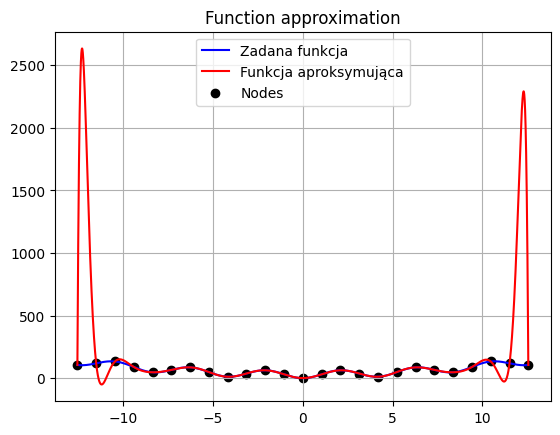

In [128]:
analyse(25, 25, "img51")

Max:  24.83857452263409 Mean:  0.49977522431247234


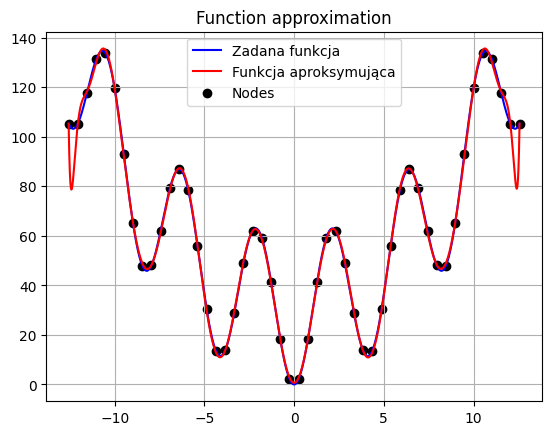

In [129]:
analyse(50, 25, "img52")

Max:  6.573095245928911 Mean:  0.08182605006975646


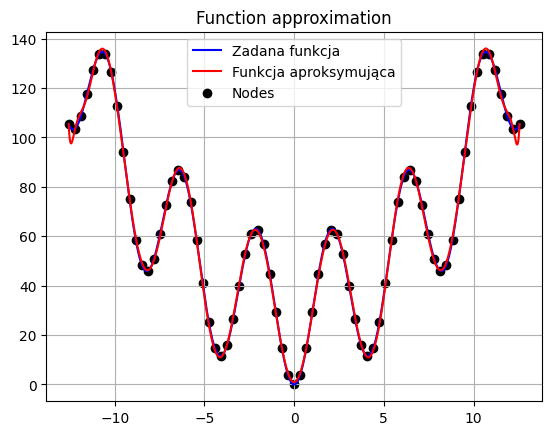

In [131]:
analyse(75, 25, "img53")

Max:  2.9971074059361626 Mean:  0.027350006723662095


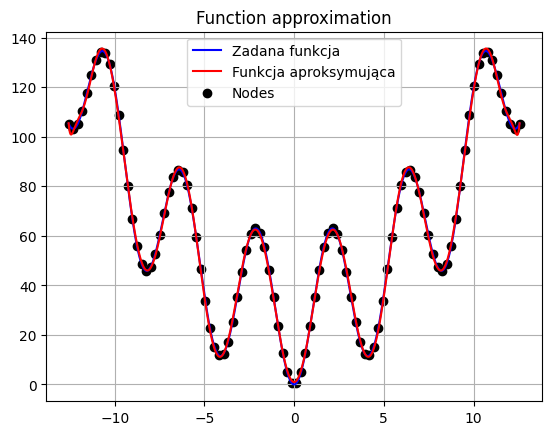

In [132]:
analyse(100, 25, "img54")

In [133]:
errors2(50, True)

degree | max diff | mean diff
50  |  4700.146254889203  |  89.54710302248682
51  |  2693.2589180874656  |  29.32629947206113
52  |  1081.1034765285217  |  -12.691163464414888
53  |  483.4239258798789  |  7.04124155080402
54  |  5168.675934400897  |  86.02620307490825
55  |  2678.2956856046785  |  -40.19792412273905
56  |  1229.9151460346989  |  20.77217246450571
57  |  2242.6775558623262  |  -25.834869414832006
58  |  1264.2884098035506  |  20.49625409636136
59  |  266.76123429786054  |  -3.462629749947804
60  |  1000.6920126644185  |  16.49387193156759
61  |  267.0343695921114  |  0.1122058847914458
62  |  494.14238465528575  |  -2.699543019528427
63  |  667.1407909574697  |  -8.729252069020902
64  |  460.5618893136492  |  3.7535886212347025
65  |  2054.9555746880583  |  14.839735837024582
66  |  767.9819824429939  |  -11.582979020174363
67  |  466.81166633868236  |  -1.686591455193106
68  |  236.26240488558648  |  -1.896489869401081
69  |  4717.484360668321  |  -35.37064626948959
70 

In [134]:
errors2(50, False)

max diff
4700.146254889203
2693.2589180874656
1081.1034765285217
483.4239258798789
5168.675934400897
2678.2956856046785
1229.9151460346989
2242.6775558623262
1264.2884098035506
266.76123429786054
1000.6920126644185
267.0343695921114
494.14238465528575
667.1407909574697
460.5618893136492
2054.9555746880583
767.9819824429939
466.81166633868236
236.26240488558648
4717.484360668321
133.91146164897475
213.6571506974509
62.31554458358633
333.260978806276
112.40936484511587
123.33001630331967
57.04403321303073
155.9135140632057
1204.7174214155102
20.008237105545874
59.063274846163864
119.66365934045362
195.51855664023506
366.12057465755686
43.76226326146471
127.59138046509278
268.7093404501055
66.49173681133735
7.697027093979244
37.12441938950988
76.68983699077117
37.55338865773129
35.361912873325224
77.29729412800324
16.442971951576595
44.2346173531686
7.92334152081358
128.2643100020786
34.491921629073744
25.564062040982122
14.065174790782208
mean diff
89.54710302248682
29.32629947206113
-12

Max:  4700.146254889203 Mean:  89.54710302248682


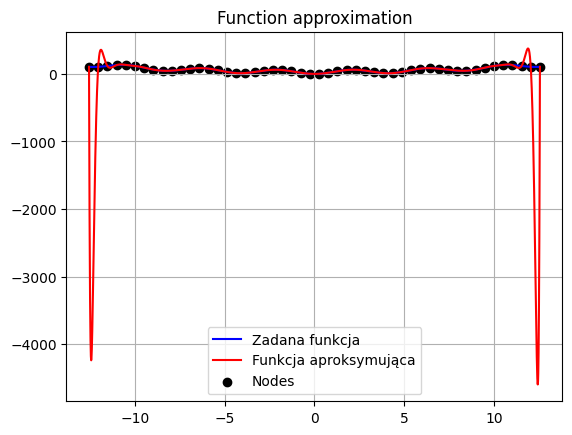

In [149]:
analyse(50, 50, "img56")

Max:  123.33001630331967 Mean:  -1.5236971536575241


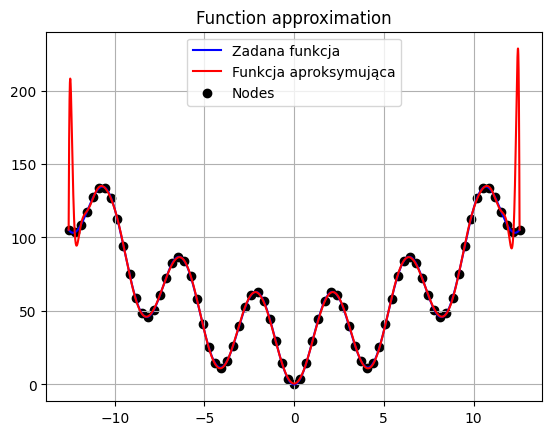

In [150]:
analyse(75, 50, "img57")

Max:  76.68983699077117 Mean:  -0.8419837214765317


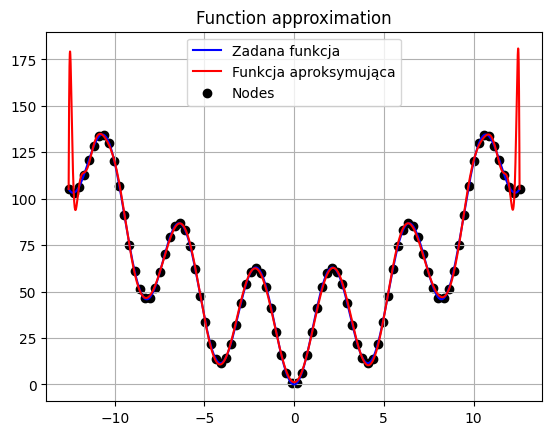

In [151]:
analyse(90, 50, "img58")

Max:  14.065174790782208 Mean:  -0.07184997387615868


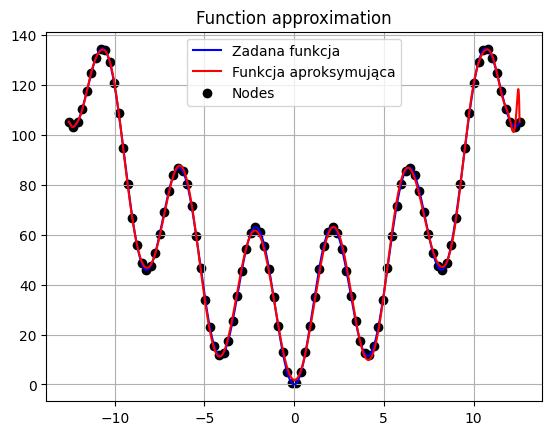

In [13]:
analyse(100, 50, "img59")

In [21]:
def minimize():
    min_val = float('inf')
    min_n = -1
    min_m = -1
    max_val = float('-inf')
    max_n = -1
    max_m = -1
    
    for n in range(3, 100 + 1):
        for m in range(3, n):
            temp = float(approximation_maximum_difference(n, m, 100))

            if temp < min_val:
                min_val = temp
                min_n = n
                min_m = m
                
            if temp > max_val:
                max_val = temp
                max_n = n
                max_m = m
                
    return min_val, min_n, min_m, max_val, max_n, max_m


In [22]:
min_val, min_n, min_m, max, max_n, max_m = minimize()

In [23]:
print(min_n, min_m)

94 25


Max:  0.5014720569615605 Mean:  0.0017181768299556364


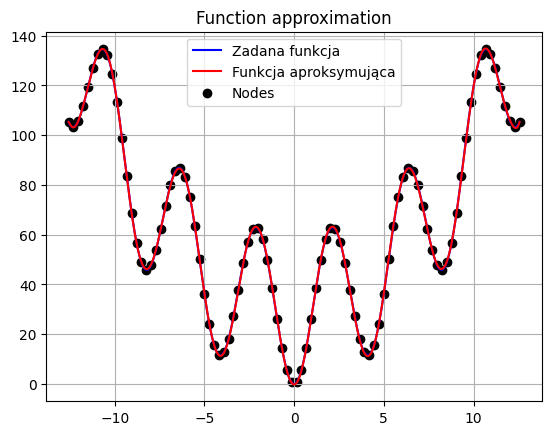

In [24]:
analyse(min_n, min_m, "best")

In [25]:
print(max_n, max_m)

40 36


Max:  176413.32885002135 Mean:  3832.7665755629732


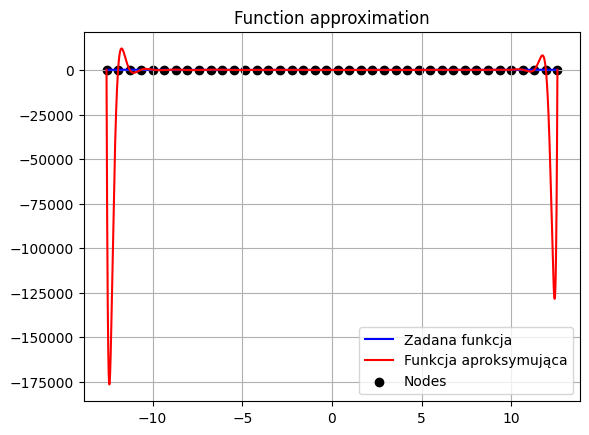

In [27]:
analyse(max_n, max_m, "runge")

Max:  35.301493811135245 Mean:  0.04463730782036845


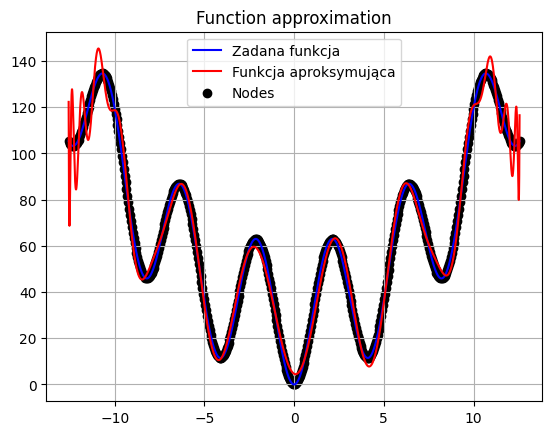

In [29]:
analyse(500, 60, "test1")